<a href="https://colab.research.google.com/github/deepikasingh007/NIDS/blob/main/NIDS_Project_Deepika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NETWORK INTRUSION DETECTION SYSTEM USING MACHINE LEARNING

IMPORTING NECESSARY LIBARARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#DATA PREPROCESSING

In [2]:
col_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label', 'difficulty_level'
]

LOADING THE DATASET

In [3]:
df = pd.read_csv("/content/KDDTrain+.txt",names=col_names)
df_test = pd.read_csv("/content/KDDTest+.txt",names=col_names)

EXPLORATORY DATA ANALYSIS

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
print(f"df has {df.shape[1]} columns")

df has 43 columns


In [ ]:
print(f"col_names has {len(col_names)} elements")

col_names has 43 elements


In [ ]:
print(df.shape)
print(df.columns)

(125973, 43)
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'difficulty_level'],
      dtype='object')


In [4]:
df.columns = col_names
df_test.columns = col_names

In [5]:
# Group labels into 5 categories
label_map = {
    'normal': 0,
    'neptune': 1, 'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1, 'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
    'ipsweep': 2, 'nmap': 2, 'portsweep': 2, 'satan': 2, 'mscan': 2, 'saint': 2,
    'ftp_write': 3, 'guess_passwd': 3, 'imap': 3, 'multihop': 3, 'phf': 3, 'spy': 3, 'warezclient': 3, 'warezmaster': 3, 'sendmail': 3, 'named': 3, 'snmpgetattack': 3,
    'snmpguess': 3, 'xlock': 3, 'xsnoop': 3, 'httptunnel': 3,
    'buffer_overflow': 4, 'loadmodule': 4, 'perl': 4, 'rootkit': 4, 'ps': 4, 'sqlattack': 4, 'xterm': 4
}
df['label'] = df['label'].map(label_map)
df_test['label'] = df_test['label'].map(label_map)

<ipython-input-11-3750556105>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='Set2')


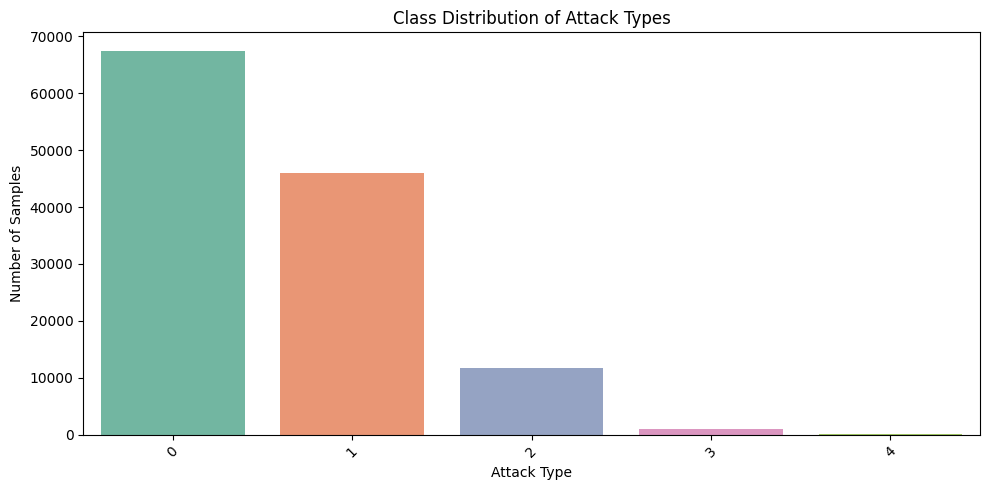

In [ ]:
# Analysing classes
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='Set2')
plt.title("Class Distribution of Attack Types")
plt.xticks(rotation=45)
plt.xlabel("Attack Type")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

The datset is highly imbalanced.

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=50cca54657ff44880095590edeac0a8d99dffaa88865e5cb97a138ac7806abc4
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
prof = ProfileReport(df)
prof.to_file(output_file='train_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 43/43 [00:09<00:00,  4.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prof = ProfileReport(df_test)
prof.to_file(output_file='test_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 43/43 [00:01<00:00, 42.15it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


No missing values in training dataset.

In [ ]:
df_test.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


No missing values in testing dataset.

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,0.574980,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,0.694105,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,21.000000


In [ ]:
df_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,0.941492,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,1.036054,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,1.000000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,21.000000


In [6]:
print(df['label'])

0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: label, Length: 125973, dtype: int64


#FEATURE ENGINEERING

In [7]:
df['label'] = df['label'].replace({
    'normal': 0,
    # DoS (Denial of Service)
    'back': 1, 'land': 1, 'neptune': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,
    'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
    # Probe (Surveillance/Scanning)
    'ipsweep': 2, 'nmap': 2, 'portsweep': 2, 'satan': 2, 'mscan': 2, 'saint': 2,
    # R2L (Remote to Local)
    'ftp_write': 3, 'guess_passwd': 3, 'imap': 3, 'multihop': 3, 'phf': 3,
    'spy': 3, 'warezclient': 3, 'warezmaster': 3, 'sendmail': 3, 'named': 3,
    'snmpgetattack': 3, 'snmpguess': 3, 'xlock': 3, 'xsnoop': 3, 'httptunnel': 3,
    # U2R (User to Root)
    'buffer_overflow': 4, 'loadmodule': 4, 'perl': 4, 'rootkit': 4,
    'ps': 4, 'sqlattack': 4, 'xterm': 4
})

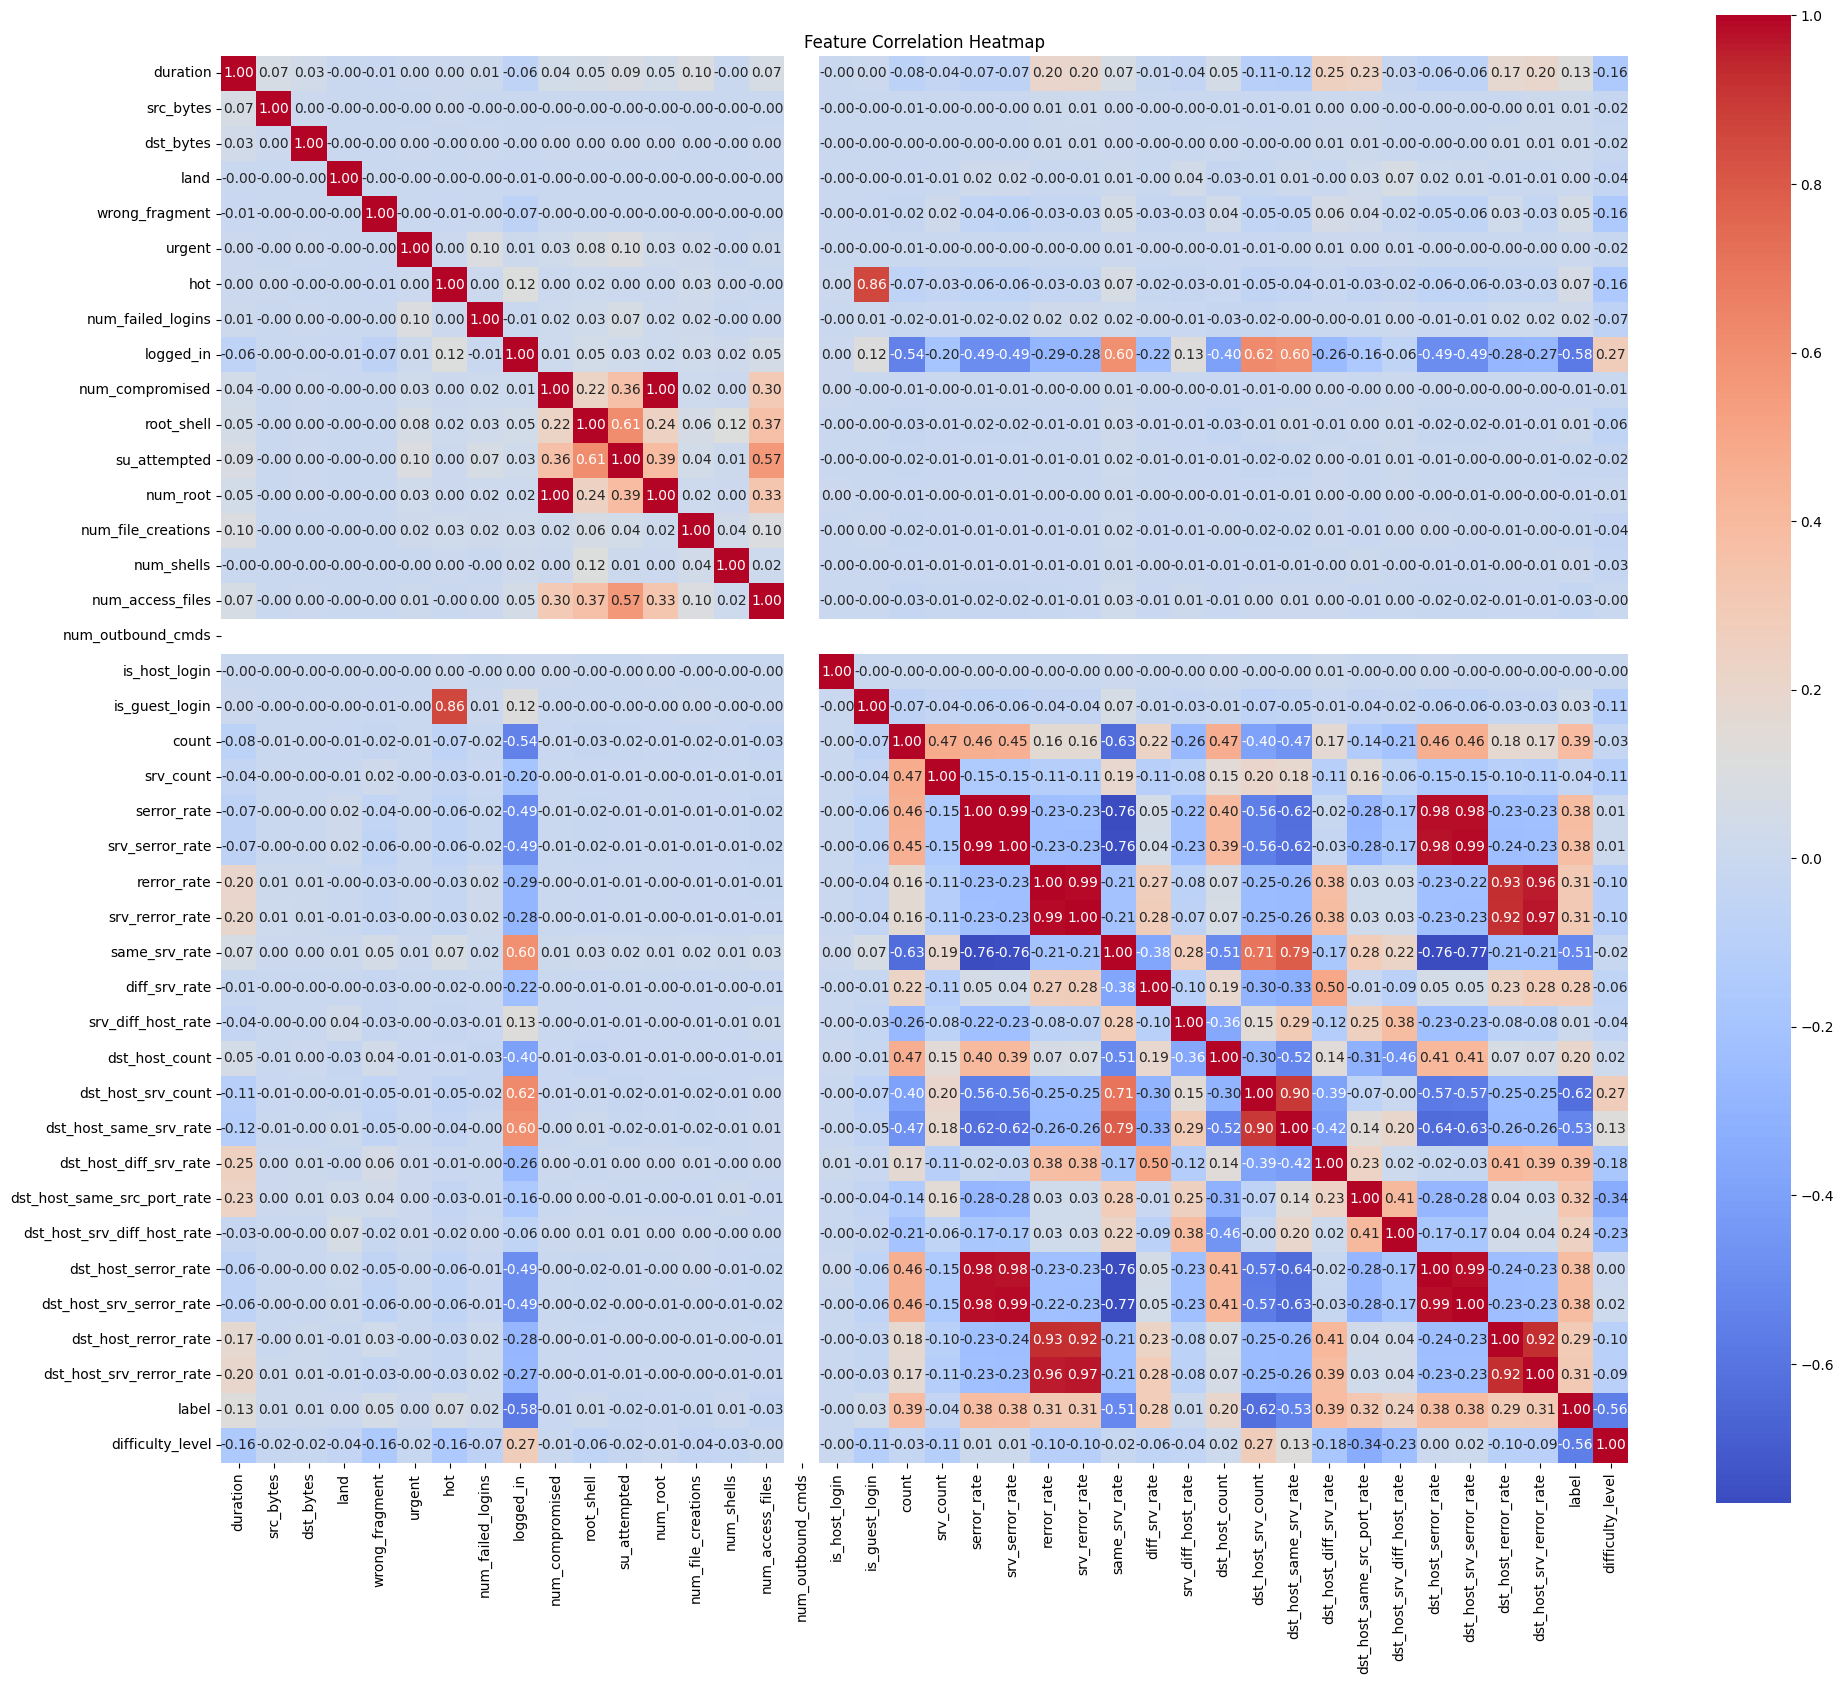

In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Computing the correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 17))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

correlation heatmap helps us understand the relationships betwwen the features. It helps us to idenify patterns in the dataset.

In [9]:
# One-hot encode categorical features
cat_cols = ['protocol_type', 'service', 'flag']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [10]:
df_cat = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
df_cat.columns = encoder.get_feature_names_out(cat_cols)

In [11]:
df_test_cat = pd.DataFrame(encoder.transform(df_test[cat_cols]))
df_test_cat.columns = encoder.get_feature_names_out(cat_cols)

In [12]:
# Align test set columns with training
df_cat, df_test_cat = df_cat.align(df_test_cat, join='outer', axis=1, fill_value=0)

In [13]:
# Drop original categorical columns and merge encoded ones
df_final = df.drop(columns=cat_cols).reset_index(drop=True)
df_test_final = df_test.drop(columns=cat_cols).reset_index(drop=True)

In [14]:
df_final = pd.concat([df_final, df_cat], axis=1)
df_test_final = pd.concat([df_test_final, df_test_cat], axis=1)

In [15]:
# Separate features and target
X = df_final.drop(columns=['label'])
y = df_final['label']

In [16]:
X_test = df_test_final.drop(columns=['label'])
y_test = df_test_final['label']

In [17]:
# Converting int64 to float64 for scaling and compatibility
X = X.astype(np.float64)
X_test = X_test.astype(np.float64)

 HANDLING IMBALANCED DATASET

In [18]:
# Applying ADASYN to balance classes
adasyn = ADASYN()
X_res, y_res = adasyn.fit_resample(X, y)

In [19]:
# Feature scaling
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(df[cat_cols])
encoded_feature_names = encoder.get_feature_names_out(cat_cols)

In [21]:
import numpy as np
numeric_data = df.drop(columns=cat_cols + ['label'])
numeric_feature_names = numeric_data.columns
all_feature_names = list(encoded_feature_names) + list(numeric_feature_names)
X_df = pd.DataFrame(X_res_scaled, columns=all_feature_names)

In [22]:
X_df.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
0,-0.122179,-0.022327,-0.024901,-0.037057,-0.058728,-0.134602,-0.226548,-0.120672,-0.980794,-0.040761,...,-0.355933,-0.181627,-0.166158,-0.177289,-0.393565,-0.077908,-0.061485,-0.034289,0.702269,-0.03904
1,-0.122179,-0.022360,-0.024901,-0.037057,-0.058728,-0.134602,-0.226548,-0.120672,-0.980794,-0.040761,...,-0.355933,-0.181627,-0.166158,-0.177289,-0.393565,-0.077908,-0.061485,-0.034289,0.702269,-0.03904
2,-0.122179,-0.022374,-0.024901,-0.037057,-0.058728,-0.134602,-0.226548,-0.120672,-0.980794,-0.040761,...,-0.355933,-0.181627,-0.166158,-0.177289,2.612612,-0.077908,-0.061485,-0.034289,-1.494289,-0.03904
3,-0.122179,-0.022352,-0.024399,-0.037057,-0.058728,-0.134602,-0.226548,-0.120672,1.080396,-0.040761,...,-0.355933,-0.181627,-0.166158,-0.177289,-0.393565,-0.077908,-0.061485,-0.034289,0.702269,-0.03904
4,-0.122179,-0.022355,-0.024875,-0.037057,-0.058728,-0.134602,-0.226548,-0.120672,1.080396,-0.040761,...,-0.355933,-0.181627,-0.166158,-0.177289,-0.393565,-0.077908,-0.061485,-0.034289,0.702269,-0.03904


Discretization

In [23]:
from sklearn.preprocessing import KBinsDiscretizer
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_discretized = X.copy()
X_discretized[numeric_cols] = discretizer.fit_transform(X[numeric_cols])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 16 is constant and will be replaced with 0.
  warnings.warn(


Feature selection

In [24]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=13)
X_selected = selector.fit_transform(X_discretized, y)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names.tolist())

Selected Features: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']


Handling Class imbalance Using Adasyn

In [25]:
# Applying ADASYN to balance classes
adasyn = ADASYN()
X_ress, y_ress = adasyn.fit_resample(X_selected, y)

#TRAINING AND EVALUATION OF MODELS

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
models = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
 }
X_train, X_test, y_train, y_test = train_test_split(X_ress, y_ress, test_size=0.2, random_state=42)

In [27]:
y_preds = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds[name] = y_pred
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Random Forest Accuracy: 0.8145
Naive Bayes Accuracy: 0.5169
Decision Tree Accuracy: 0.8144
KNN Accuracy: 0.7957


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:38:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8155


In [ ]:
import joblib
# Save your model after training
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

RANDOM FOREST

In [28]:
from sklearn.metrics import classification_report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_preds["Random Forest"]))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85     13446
           1       0.86      0.80      0.83     13454
           2       0.75      0.90      0.82     13800
           3       0.84      0.69      0.76     13456
           4       0.77      0.87      0.82     13542

    accuracy                           0.81     67698
   macro avg       0.82      0.81      0.81     67698
weighted avg       0.82      0.81      0.81     67698



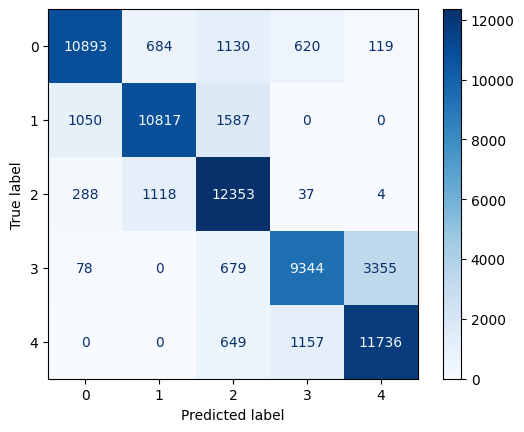

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_preds["Random Forest"], cmap="Blues")

KNN

In [30]:
print("KNN Classification Report:")
print(classification_report(y_test, y_preds["KNN"]))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     13446
           1       0.87      0.78      0.82     13454
           2       0.79      0.77      0.78     13800
           3       0.71      0.77      0.74     13456
           4       0.79      0.83      0.81     13542

    accuracy                           0.80     67698
   macro avg       0.80      0.80      0.80     67698
weighted avg       0.80      0.80      0.80     67698



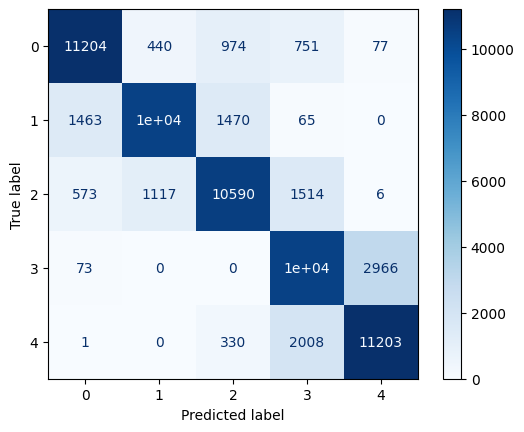

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds["KNN"], cmap="Blues")

NAIVE BAYES

In [32]:
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_preds["Naive Bayes"]))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.60      0.70     13446
           1       0.90      0.51      0.65     13454
           2       0.49      0.31      0.38     13800
           3       0.36      0.18      0.24     13456
           4       0.38      0.98      0.55     13542

    accuracy                           0.52     67698
   macro avg       0.59      0.52      0.50     67698
weighted avg       0.59      0.52      0.50     67698



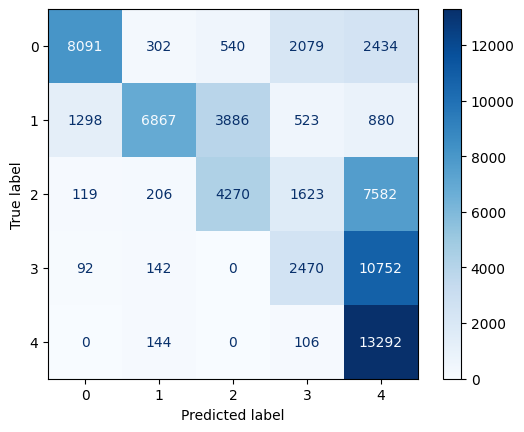

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds["Naive Bayes"], cmap="Blues")

DECISION TREE

In [34]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_preds["Decision Tree"]))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85     13446
           1       0.86      0.80      0.83     13454
           2       0.75      0.89      0.82     13800
           3       0.84      0.69      0.76     13456
           4       0.77      0.87      0.82     13542

    accuracy                           0.81     67698
   macro avg       0.82      0.81      0.81     67698
weighted avg       0.82      0.81      0.81     67698



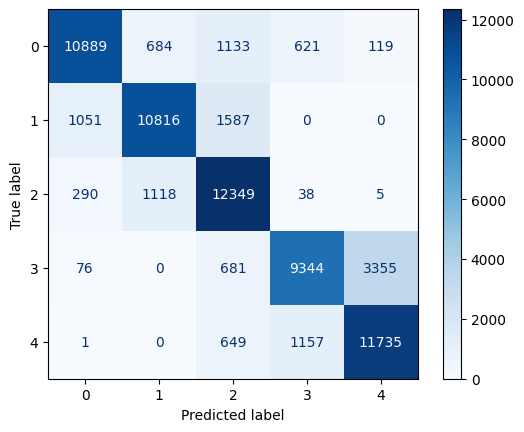

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds["Decision Tree"], cmap="Blues")

XGBOOST

In [36]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85     13446
           1       0.86      0.80      0.83     13454
           2       0.75      0.90      0.82     13800
           3       0.84      0.69      0.76     13456
           4       0.77      0.87      0.82     13542

    accuracy                           0.82     67698
   macro avg       0.82      0.81      0.81     67698
weighted avg       0.82      0.82      0.81     67698



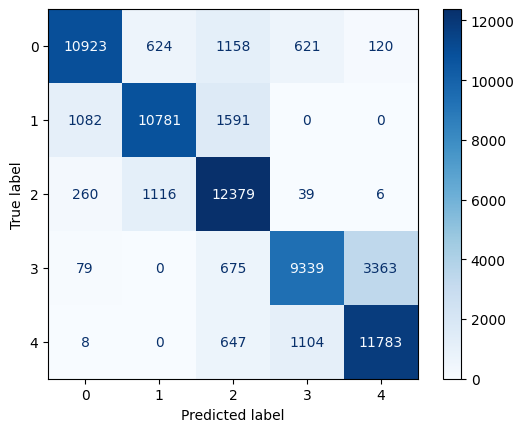

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [38]:
from sklearn.metrics import accuracy_score
accuracies = {}
for name, y_pred in y_preds.items():
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

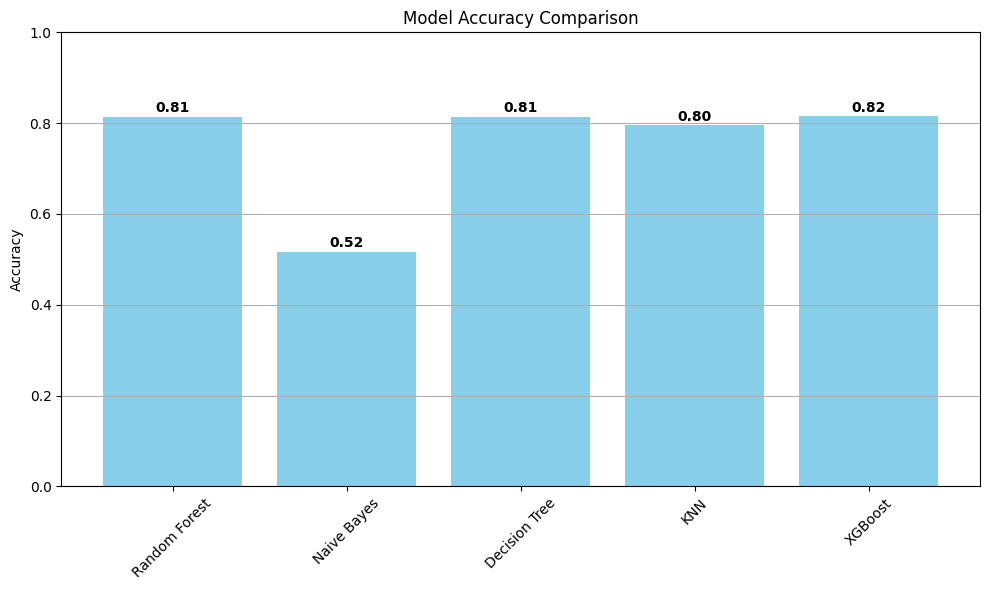

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y')
for i, (name, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

BEST MODEL: XGBOOST